In [1]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from scipy import stats
from statsmodels.tsa.stattools import pacf # partial autocorrelation 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #Autocorrelation function & partial autocorrelation function
from sklearn.ensemble import RandomForestRegressor #modelo random forest
from sklearn.cross_validation import train_test_split # para separar los data sets. 
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.grid_search import GridSearchCV   #Perforing grid search for parameters tuning
from sklearn.feature_selection import RFE #recursive feature selection 

In [2]:
#import Data por industria
file= 'Dataframe_Importaciones_mensuales_version2.csv'
datos=pd.read_csv(file,
                       header=0,
                       index_col=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True,
                 encoding='latin-1')
datos

,Pais_vendedor,industria,Año,Mes,Monto
0,América Latina,Industrias Manufactureras,2000,Enero,30303804.0
1,América Latina,Industrias Manufactureras,2000,Febrero,21215828.0
2,América Latina,Industrias Manufactureras,2000,Marzo,31298113.0
3,América Latina,Industrias Manufactureras,2000,Abril,33358374.0
4,América Latina,Industrias Manufactureras,2000,Mayo,67373766.0
5,América Latina,Industrias Manufactureras,2000,Junio,58354363.0
6,América Latina,Industrias Manufactureras,2000,Julio,47566573.0
7,América Latina,Industrias Manufactureras,2000,Agosto,51311091.0
8,América Latina,Industrias Manufactureras,2000,Septiembre,36400806.0
9,América Latina,Industrias Manufactureras,2000,Octubre,50265853.0


In [3]:
%matplotlib inline

In [4]:
# Data frame de serie mensual total(para rezagos óptimos correctos):

serie_total=datos.groupby(['Año','Mes'],as_index=False,sort=False).sum()
serie_total

,Año,Mes,Monto
0,2000,Enero,1.027828e+09
1,2000,Febrero,9.375934e+08
2,2000,Marzo,1.086400e+09
3,2000,Abril,1.130722e+09
4,2000,Mayo,1.538802e+09
5,2000,Junio,1.424626e+09
6,2000,Julio,1.360497e+09
7,2000,Agosto,1.600264e+09
8,2000,Septiembre,1.356500e+09
9,2000,Octubre,1.525938e+09


In [29]:
Max_lags=12
output_col=2

In [6]:
#funcion para autocorrelacion y autocorrelacion parcial 

def autocorrelation(Data,col_objetivo,max_lags):
    print(plot_acf(Data.iloc[:,col_objetivo], lags=max_lags))
    print(plot_pacf(Data.iloc[:,col_objetivo], lags=max_lags))
   

Figure(480x320)
Figure(480x320)


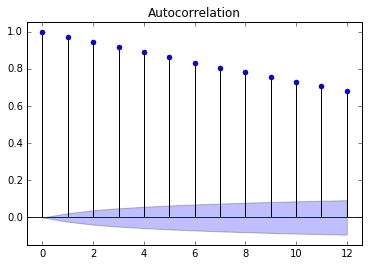

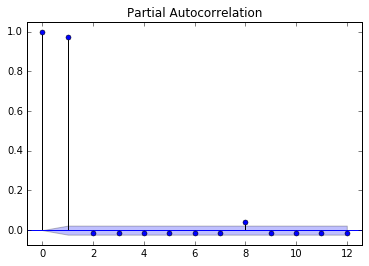

In [7]:
#llamar funcion "autocorrelation" 
autocorrelation(datos,output_col,Max_lags)

In [8]:
def is_significant(value, threshold):
        return (value <= -threshold) or (value >= threshold)

def confident_lags(pacf_vector, threshold):
    compare_zip = zip(map(lambda x: is_significant(x, threshold), pacf_vector),
                range(len(pacf_vector)))
    return [val[1] for val in compare_zip if val[0]]

In [25]:
alpha=.05
significance_threshold = stats.norm.ppf(1 - alpha) / np.sqrt(len(datos.iloc[:,4]))

# funcion para obtener rezagos significativos con un alpha determinado previamente 

def rezagos(Data,col_objetivo,max_lags,significance_threshold):
    pacf_vect = pacf(Data.iloc[:,col_objetivo], nlags=max_lags)
    lags = confident_lags(pacf_vect, significance_threshold)
    return(lags[1:])  # "1" para eliminar el rezago "0"

In [26]:
# mandar llamar la funcion para rezagos significativos
lags=rezagos(datos,output_col,Max_lags,significance_threshold)
lags

[1, 8]

In [30]:
# funcion para generar dataframe de rezagos

def generar_rezagos(Data,col_objetivo,max_lags,lags):
    dataframe = pd.DataFrame()
    for i in range(0,max_lags+1,1):
        dataframe['t-'+str(i)] = Data.iloc[:,col_objetivo].shift(i)
    df_rezagos=dataframe.iloc[max(lags):,lags]
    return(df_rezagos)

In [36]:
#mandar llamar funcion para generar DF de los rezagos
output_col=4
df_rezagos=generar_rezagos(datos,output_col,Max_lags,lags)
df_rezagos.head(15)


,t-1,t-8
8,51311091.0,30303804.0
9,36400806.0,21215828.0
10,50265853.0,31298113.0
11,59435550.0,33358374.0
12,68588145.0,67373766.0
13,57938134.0,58354363.0
14,46262851.0,47566573.0
15,48055653.0,51311091.0
16,49784064.0,36400806.0
17,45214985.0,50265853.0


In [92]:
#unir DF de datos originales con DF de rezagos

datanew=datos.iloc[max(lags):,:].join(df_rezagos)
datanew

,Pais_vendedor,industria,Año,Mes,Monto,t-1,t-8
8,América Latina,Industrias Manufactureras,2000,Septiembre,36400806.0,51311091.0,30303804.0
9,América Latina,Industrias Manufactureras,2000,Octubre,50265853.0,36400806.0,21215828.0
10,América Latina,Industrias Manufactureras,2000,Noviembre,59435550.0,50265853.0,31298113.0
11,América Latina,Industrias Manufactureras,2000,Diciembre,68588145.0,59435550.0,33358374.0
12,América Latina,Industrias Manufactureras,2001,Enero,57938134.0,68588145.0,67373766.0
13,América Latina,Industrias Manufactureras,2001,Febrero,46262851.0,57938134.0,58354363.0
14,América Latina,Industrias Manufactureras,2001,Marzo,48055653.0,46262851.0,47566573.0
15,América Latina,Industrias Manufactureras,2001,Abril,49784064.0,48055653.0,51311091.0
16,América Latina,Industrias Manufactureras,2001,Mayo,45214985.0,49784064.0,36400806.0
17,América Latina,Industrias Manufactureras,2001,Junio,49105659.0,45214985.0,50265853.0


In [68]:
#funcion para modificiar variables categóricas

def categoricas(Data,tipo):
    if tipo==1: # variables pais comprador e industria se convierten a variables tipo dummie
        
        Data.Mes=Data.Mes.map({'Enero':1,'Febrero':2,'Marzo':3,'Abril':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9
                               ,'Octubre':10,'Noviembre':11,'Diciembre':12})
        Data['Año']=Data['Año'].values.astype(np.float)
        no_dummie=Data.iloc[:,2:]
        temp=pd.get_dummies(Data['Pais_vendedor'])
        temp1=pd.get_dummies(Data['industria'])
        datafinal=temp.join(temp1).join(no_dummie)
        datafinal=datafinal.reset_index(drop=True)
        
    if tipo==2: # variables pais vendedor e industria se reemplazan por números 1,2,3....n asignados jerarquicamente por volumen de importacion.
        Data.Mes=Data.Mes.map({'Enero':1,'Febrero':2,'Marzo':3,'Abril':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9
                               ,'Octubre':10,'Noviembre':11,'Diciembre':12})
        Data['Año']=Data['Año'].values.astype(np.float)
        
        Data.Pais_vendedor=Data.Pais_vendedor.map({'América Latina':4,'Asia':2,'Europa':3,'Africa':5,'Oceanía':6,'América del Norte':1
                               ,'otro':7})
        Data.industria=Data.industria.map({'Industrias Manufactureras':1,'Agricultura y Silvicultura':2,'Servicios y Productos no Clasificados':3
                                           ,'Industrias Extractivas':4,'Ganadería, Apicultura, Caza, Pesca':5})
        datafinal=Data
        
    if tipo==3: # variables pais vendedor e industria se reemplazan por el promedio mensual de las importaciones del segmento(solo conjunto train).
        Data.Mes=Data.Mes.map({'Enero':1,'Febrero':2,'Marzo':3,'Abril':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9
                               ,'Octubre':10,'Noviembre':11,'Diciembre':12})
        Data['Año']=Data['Año'].values.astype(np.float)
        
        data_train=datos.query('Año<2015').reset_index(drop=True) #desde diciembre 2000 hasta 2014 
        datosporindus=data_train.groupby('industria',as_index=True)['Monto'].mean()
        datosporpais=data_train.groupby('Pais_vendedor',as_index=True)['Monto'].mean()
        
        Data.Pais_vendedor=Data.Pais_vendedor.map({'América Latina':datosporpais['América Latina'],'Asia':datosporpais['Asia']
                                                     ,'Europa':datosporpais['Europa'],'Africa':datosporpais['Africa']
                                                     ,'Oceanía':datosporpais['Oceanía'],'América del Norte':datosporpais['América del Norte']
                                                     ,'otro':datosporpais['otro']})
        Data.industria=Data.industria.map({'Industrias Manufactureras':datosporindus['Industrias Manufactureras']
                                           ,'Agricultura y Silvicultura':datosporindus['Agricultura y Silvicultura']
                                           ,'Servicios y Productos no Clasificados':datosporindus['Servicios y Productos no Clasificados']
                                           ,'Industrias Extractivas':datosporindus['Industrias Extractivas']
                                           ,'Ganadería, Apicultura, Caza, Pesca':datosporindus['Ganadería, Apicultura, Caza, Pesca']})
        datafinal=Data
        
    return(datafinal)

In [93]:
#mandar llamar funcion para modificar var categóricas
tipo=1 #al parecer eltipo que mejor funcionó fue el tipo 1 (dummies)
data_mof=categoricas(datanew,tipo)

In [86]:
#convertir Dataframe para modelado a CSV con rezagos óptimos de la serie total
data_mof.to_csv('DataframeImportsparamodelado.csv')

In [96]:
variables_entrada=datanew.query('Año == 2017 or (Año==2016 & Mes>7)').reset_index(drop=True)

In [97]:
#convertir variables entrada a CSV
variables_entrada.to_csv('DFImportsvarentrada.csv')

In [87]:
#funcion para facilitar el modelado 
def modelfit1(algorithm,datos,tipo,printFeatureImportance=True): 
        
    #dividir train,cross y tst
    data_train=datos.query('Año<2015').reset_index(drop=True) #desde diciembre 2000 hasta 2012 
    data_cross=datos.query('(Año==2016 & Mes<8) or (Año<2016 & Año>2014)').reset_index(drop=True) #2013 hasta julio 2016
    data_test=datos.query('Año == 2017 or (Año==2016 & Mes>7)').reset_index(drop=True) #ultimos 12 meses
    
    if tipo==1:
        #separar "x,y"
        Y_train=data_train.iloc[:,14:15]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_cross=data_cross.iloc[:,14:15]
        X_cross=data_cross.ix[:, data_cross.columns != 'Monto']

        Y_test=data_test.iloc[:,14:15]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    else:
        #separar "x,y"
        Y_train=data_train.iloc[:,4:5]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_cross=data_cross.iloc[:,4:5]
        X_cross=data_cross.ix[:, data_cross.columns != 'Monto']

        Y_test=data_test.iloc[:,4:5]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
                  
    #Fit the algorithm on the training data
    algorithm.fit(X_train,Y_train)
        
    #Predict cross set:
    dcross_predictions = algorithm.predict(X_cross)
    
    #errores personalizados para Cross set:
    pd_dcross_predictions=pd.DataFrame(dcross_predictions)
    diferencias_abs=pd.DataFrame(abs(Y_cross.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(dcross_predictions)
    sum_reales=sum(Y_cross.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_cross=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_cross=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #Print model report:
    print ("\nModel Report")
    print ("Cross mean_squared_error : %.4g" % mean_squared_error(Y_cross.values, dcross_predictions))
    print ("Cross error de la suma total de todas las predicciones : %.4g" %porcentaje_error_cross)
    print ("Cross error del monto de cada prediccion(420) : %.4g" %porcentaje_error_abs_cross)
    
    #Predict test set:
    dtest_predictions = algorithm.predict(X_test)
    
    #Print model report:
    print ("\nModel Report")
    print ("Cross mean_squared_error : %.4g" % mean_squared_error(Y_cross.values, dcross_predictions))

    #Print model report:
    print ("\nModel Report")
    print ("Test mean_squared_error : %.4g" % mean_squared_error(Y_test.values, dtest_predictions))
           
    #Print Feature Importance:
    if printFeatureImportance:
        predictors=list(X_train.columns.values)
        feat_imp = pd.Series(algorithm.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
    return dtest_predictions,Y_test

C:\Users\Edu\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Report
Cross mean_squared_error : 1.385e+15
Cross error de la suma total de todas las predicciones : 0.04085
Cross error del monto de cada prediccion(420) : 0.09294

Model Report
Cross mean_squared_error : 1.385e+15

Model Report
Test mean_squared_error : 2.595e+15


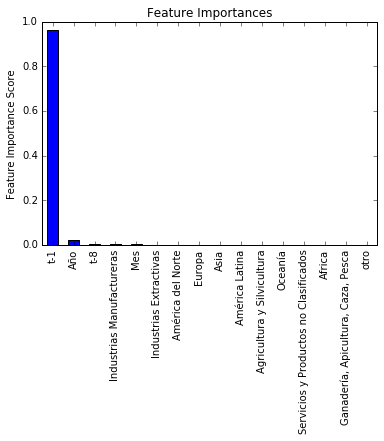

In [94]:
#crear modelo y mandar llamar funcion para modelado
tipo=1
gbm0 = RandomForestRegressor(random_state=1) # default parameters, gini by dedault 
X_test,Y_test=modelfit1(gbm0,data_mof,tipo)


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Selected Features:
t-1
t-2
t-3
t-4
t-7
t-11


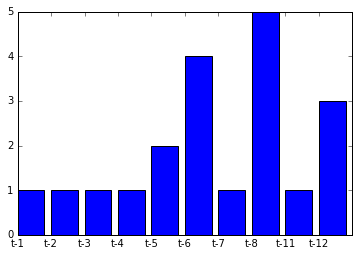

In [44]:
#Recursive Feature Selection (RFE). RFE works by creating predictive models, weighting features, and pruning those 
# with the smallest weights, then repeating the process until a desired number of features are left.

# separate into input and output variables
#array = dataframe.values
X = data_mof.iloc[:,16:]
Y = data_mof.iloc[:,15:16]
# perform feature selection
rfe = RFE(RandomForestRegressor(random_state=1), 6)
fit = rfe.fit(X, Y)
# report selected features
print('Selected Features:')
names = data_mof.columns.values[16:]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = data_mof.columns.values[16:]
ticks = [i for i in range(len(names))]
plt.bar(ticks, fit.ranking_)
plt.xticks(ticks, names)
plt.show()

In [45]:
final_lags=[1,2,3,4,5,7,11] #rezagos finales
#mandar llamar funcion para generar DF de los rezagos finales
df_rezagos_finales=generar_rezagos(datos,output_col,Max_lags,final_lags)
df_rezagos_finales.head(15)

,t-1,t-2,t-3,t-4,t-5,t-7,t-11
11,59435550.0,50265853.0,36400806.0,51311091.0,47566573.0,67373766.0,30303804.0
12,68588145.0,59435550.0,50265853.0,36400806.0,51311091.0,58354363.0,21215828.0
13,57938134.0,68588145.0,59435550.0,50265853.0,36400806.0,47566573.0,31298113.0
14,46262851.0,57938134.0,68588145.0,59435550.0,50265853.0,51311091.0,33358374.0
15,48055653.0,46262851.0,57938134.0,68588145.0,59435550.0,36400806.0,67373766.0
16,49784064.0,48055653.0,46262851.0,57938134.0,68588145.0,50265853.0,58354363.0
17,45214985.0,49784064.0,48055653.0,46262851.0,57938134.0,59435550.0,47566573.0
18,49105659.0,45214985.0,49784064.0,48055653.0,46262851.0,68588145.0,51311091.0
19,45589735.0,49105659.0,45214985.0,49784064.0,48055653.0,57938134.0,36400806.0
20,49855900.0,45589735.0,49105659.0,45214985.0,49784064.0,46262851.0,50265853.0


In [53]:
#unir DF de datos originales con DF de rezagos finales

data_fin=datos.iloc[max(final_lags):,:].join(df_rezagos_finales).reset_index(drop=True)
data_fin

,Pais_vendedor,industria,Año,Mes,Monto,t-1,t-2,t-3,t-4,t-5,t-7,t-11
0,América Latina,Industrias Manufactureras,2000,Diciembre,68588145.0,59435550.0,50265853.0,36400806.0,51311091.0,47566573.0,67373766.0,30303804.0
1,América Latina,Industrias Manufactureras,2001,Enero,57938134.0,68588145.0,59435550.0,50265853.0,36400806.0,51311091.0,58354363.0,21215828.0
2,América Latina,Industrias Manufactureras,2001,Febrero,46262851.0,57938134.0,68588145.0,59435550.0,50265853.0,36400806.0,47566573.0,31298113.0
3,América Latina,Industrias Manufactureras,2001,Marzo,48055653.0,46262851.0,57938134.0,68588145.0,59435550.0,50265853.0,51311091.0,33358374.0
4,América Latina,Industrias Manufactureras,2001,Abril,49784064.0,48055653.0,46262851.0,57938134.0,68588145.0,59435550.0,36400806.0,67373766.0
5,América Latina,Industrias Manufactureras,2001,Mayo,45214985.0,49784064.0,48055653.0,46262851.0,57938134.0,68588145.0,50265853.0,58354363.0
6,América Latina,Industrias Manufactureras,2001,Junio,49105659.0,45214985.0,49784064.0,48055653.0,46262851.0,57938134.0,59435550.0,47566573.0
7,América Latina,Industrias Manufactureras,2001,Julio,45589735.0,49105659.0,45214985.0,49784064.0,48055653.0,46262851.0,68588145.0,51311091.0
8,América Latina,Industrias Manufactureras,2001,Agosto,49855900.0,45589735.0,49105659.0,45214985.0,49784064.0,48055653.0,57938134.0,36400806.0
9,América Latina,Industrias Manufactureras,2001,Septiembre,38361331.0,49855900.0,45589735.0,49105659.0,45214985.0,49784064.0,46262851.0,50265853.0


In [54]:
#mandar llamar funcion para modificar var categóricas
data_final=categoricas(data_fin)

In [57]:
data_final.iloc[:,8:]

,Agricultura y Silvicultura,"Ganadería, Apicultura, Caza, Pesca",Industrias Extractivas,Industrias Manufactureras,Servicios y Productos no Clasificados,Año,Mes,Monto,t-1,t-2,t-3,t-4,t-5,t-7,t-11
0,0.0,0.0,0.0,1.0,0.0,2000.0,12,68588145.0,59435550.0,50265853.0,36400806.0,51311091.0,47566573.0,67373766.0,30303804.0
1,0.0,0.0,0.0,1.0,0.0,2001.0,1,57938134.0,68588145.0,59435550.0,50265853.0,36400806.0,51311091.0,58354363.0,21215828.0
2,0.0,0.0,0.0,1.0,0.0,2001.0,2,46262851.0,57938134.0,68588145.0,59435550.0,50265853.0,36400806.0,47566573.0,31298113.0
3,0.0,0.0,0.0,1.0,0.0,2001.0,3,48055653.0,46262851.0,57938134.0,68588145.0,59435550.0,50265853.0,51311091.0,33358374.0
4,0.0,0.0,0.0,1.0,0.0,2001.0,4,49784064.0,48055653.0,46262851.0,57938134.0,68588145.0,59435550.0,36400806.0,67373766.0
5,0.0,0.0,0.0,1.0,0.0,2001.0,5,45214985.0,49784064.0,48055653.0,46262851.0,57938134.0,68588145.0,50265853.0,58354363.0
6,0.0,0.0,0.0,1.0,0.0,2001.0,6,49105659.0,45214985.0,49784064.0,48055653.0,46262851.0,57938134.0,59435550.0,47566573.0
7,0.0,0.0,0.0,1.0,0.0,2001.0,7,45589735.0,49105659.0,45214985.0,49784064.0,48055653.0,46262851.0,68588145.0,51311091.0
8,0.0,0.0,0.0,1.0,0.0,2001.0,8,49855900.0,45589735.0,49105659.0,45214985.0,49784064.0,48055653.0,57938134.0,36400806.0
9,0.0,0.0,0.0,1.0,0.0,2001.0,9,38361331.0,49855900.0,45589735.0,49105659.0,45214985.0,49784064.0,46262851.0,50265853.0
